In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing


In [2]:
#Loading Data
df = pd.read_csv('../Project_4/data/model_data_3sec.csv')
df.head()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,3585.029860,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2-000574.mp3,0.436518,0.074070,0.263343,0.001272,1969.829480,75422.537033,2031.262553,55656.387528,3668.926532,...,34.857918,-7.328859,30.140669,0.171362,23.946671,-5.767624,31.231506,3.249825,28.855471,Rock
2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,5738.018893,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,6252.910907,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,5554.903846,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock


In [3]:
# remove null values
df.dropna()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,1-000574.mp3,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,3585.029860,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,2-000574.mp3,0.436518,0.074070,0.263343,0.001272,1969.829480,75422.537033,2031.262553,55656.387528,3668.926532,...,34.857918,-7.328859,30.140669,0.171362,23.946671,-5.767624,31.231506,3.249825,28.855471,Rock
2,3-000574.mp3,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,5738.018893,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
3,4-000574.mp3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,6252.910907,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
4,5-000574.mp3,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,5554.903846,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79935,6-155066.mp3,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,266648.246421,703.804462,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
79936,7-155066.mp3,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,567015.357017,775.692233,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
79937,8-155066.mp3,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,579189.561418,887.664889,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
79938,9-155066.mp3,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,574072.621801,730.638146,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [4]:
df.drop('filename', axis =1)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.381544,0.080175,0.249562,0.001513,1957.407156,39590.736312,2048.485350,25901.153997,3585.029860,1.867136e+05,...,30.766535,-8.990259,43.198818,1.595329,27.528227,-6.731744,34.697533,4.317326,35.314476,Rock
1,0.436518,0.074070,0.263343,0.001272,1969.829480,75422.537033,2031.262553,55656.387528,3668.926532,6.104805e+05,...,34.857918,-7.328859,30.140669,0.171362,23.946671,-5.767624,31.231506,3.249825,28.855471,Rock
2,0.484288,0.069135,0.253424,0.001391,2766.351306,309436.169216,2542.654962,168310.924937,5738.018893,1.990203e+06,...,25.085670,-7.587147,42.912727,0.172193,30.070772,-5.444875,14.732526,1.197923,23.562773,Rock
3,0.425569,0.074970,0.256628,0.001596,2908.207536,157800.863917,2703.913526,39721.816727,6252.910907,7.687181e+05,...,21.063715,-8.594354,15.883783,-0.271126,27.283262,-5.592191,24.557570,-0.288590,14.412757,Rock
4,0.468948,0.066816,0.265448,0.001309,2618.340173,129314.679539,2548.584807,34028.788419,5554.903846,6.942766e+05,...,23.539871,-9.315182,17.867613,-3.543423,15.073790,-5.760088,25.771444,2.120627,32.800819,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79935,0.457243,0.066993,0.243057,0.000386,483.225740,45172.684403,875.708502,266648.246421,703.804462,4.528384e+04,...,44.069397,4.513030,35.256451,4.309551,25.806019,9.335838,30.525654,4.856527,22.975540,Hip-Hop
79936,0.447897,0.071476,0.234766,0.000319,660.113748,112158.840869,1349.132689,567015.357017,775.692233,2.357573e+05,...,94.042519,1.916095,32.742737,2.931519,26.395258,7.093570,41.896832,5.723800,27.765524,Hip-Hop
79937,0.444989,0.068753,0.230987,0.000125,631.195340,129673.607382,1317.927939,579189.561418,887.664889,6.242206e+05,...,42.242142,4.368050,34.333134,4.368290,35.798908,7.466063,37.081589,1.732873,36.141926,Hip-Hop
79938,0.485998,0.070497,0.233158,0.000335,616.469137,113308.485962,1299.877639,574072.621801,730.638146,2.414888e+05,...,32.535034,1.273448,29.834116,4.322249,15.078435,9.085366,24.073069,6.584610,37.525909,Hip-Hop


In [5]:
# converting string labels into numbers
le = preprocessing.LabelEncoder()
X = df.drop(['label','filename'], axis = 1)
y = le.fit_transform(df.label.values)

In [6]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Scaling the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.75578762e+00, -2.21241908e+00,  5.92212457e+00, ...,
        -8.59529693e-01,  4.08425306e-01, -7.64583879e-01],
       [-9.18414084e-01,  7.27777649e-01,  5.61886600e-02, ...,
        -1.24403519e-01, -4.44974747e-01, -7.27371798e-01],
       [-9.70868668e-01,  1.51790804e+00, -7.36370542e-01, ...,
         5.04418860e-01,  8.97235078e-01,  1.85362102e-01],
       ...,
       [ 1.76439943e-01,  7.48520867e-01,  1.41215862e+00, ...,
         4.75394097e-02, -3.80749134e-01, -5.81495707e-03],
       [-6.63604076e-01, -1.86694325e-01,  1.05918851e-01, ...,
         1.00657403e+00,  1.26390369e+00,  8.42233108e-01],
       [-9.15932878e-01, -8.95362865e-02, -6.93648998e-01, ...,
         1.14504535e+00, -6.83945732e-01,  9.47224009e-01]])

k: 1, Train/Test Score: 1.000/0.860
k: 3, Train/Test Score: 0.926/0.826
k: 5, Train/Test Score: 0.889/0.799
k: 7, Train/Test Score: 0.857/0.777
k: 9, Train/Test Score: 0.830/0.757
k: 11, Train/Test Score: 0.806/0.738
k: 13, Train/Test Score: 0.784/0.720
k: 15, Train/Test Score: 0.764/0.704
k: 17, Train/Test Score: 0.745/0.688
k: 19, Train/Test Score: 0.727/0.672


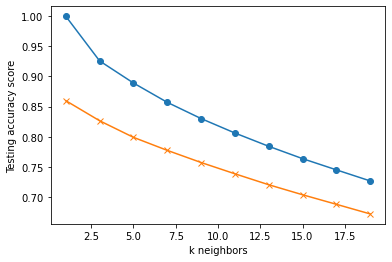

In [8]:
#Generating Model 
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")  
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [13]:
# Choose the best k, and refit the KNN classifier by using that k value.
# Print the score for the test data.
# YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 train Accuracy: %.3f' % knn.score(X_train_scaled, y_train))
print('k=3 test Accuracy: %.3f' % knn.score(X_test_scaled, y_test))

k=3 train Accuracy: 0.926
k=3 test Accuracy: 0.826


In [10]:
from joblib import dump, load
dump(knn, 'Model/3_sec-model_knn.joblib')

['Model/3_sec-model_knn.joblib']